In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('Employee.csv')
print(df.shape)
df.head()

(4653, 9)


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [7]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [15]:
df[df.duplicated()]

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
111,Bachelors,2017,Pune,2,27,Female,No,5,1
130,Bachelors,2017,Bangalore,3,26,Female,No,4,0
138,Bachelors,2017,New Delhi,3,28,Male,No,2,0
160,Bachelors,2014,Bangalore,3,28,Female,No,3,0
167,Bachelors,2014,Bangalore,3,25,Male,No,3,0
...,...,...,...,...,...,...,...,...,...
4640,Bachelors,2015,Bangalore,3,35,Male,No,0,0
4642,Bachelors,2012,Bangalore,3,36,Female,No,4,0
4646,Bachelors,2013,Bangalore,3,25,Female,No,3,0
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0


In [16]:
df[df.duplicated(keep=False)]

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
5,Bachelors,2016,Bangalore,3,22,Male,No,0,0
8,Bachelors,2016,Pune,3,23,Male,No,1,0
10,Masters,2012,Bangalore,3,27,Male,No,5,1
14,Bachelors,2012,Bangalore,3,37,Male,No,4,0
...,...,...,...,...,...,...,...,...,...
4640,Bachelors,2015,Bangalore,3,35,Male,No,0,0
4642,Bachelors,2012,Bangalore,3,36,Female,No,4,0
4646,Bachelors,2013,Bangalore,3,25,Female,No,3,0
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0


In [14]:
# does our data have duplicated rows?
df.duplicated().sum()

np.int64(1889)

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.shape

(2764, 9)

In [19]:
df['Education'].value_counts()

Education
Bachelors    1971
Masters       637
PHD           156
Name: count, dtype: int64

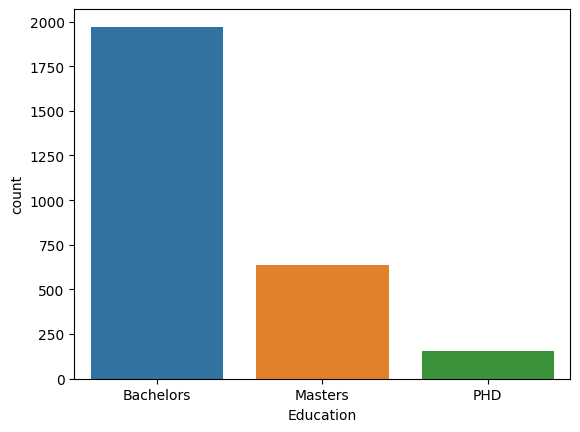

In [22]:
sns.countplot(x=df['Education'], hue=df['Education']);

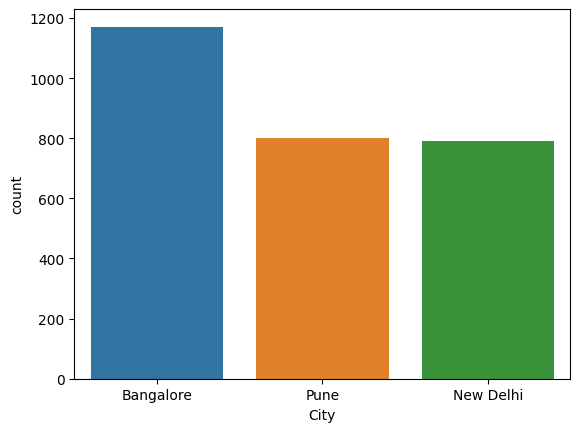

In [23]:
sns.countplot(x=df['City'], hue=df['City']);

In [24]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000
mean,2015.090449,2.636035,30.952967,2.644356,0.393632
std,1.885943,0.624001,5.108872,1.610610,0.488643
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,2.000000,27.000000,1.000000,0.000000
50%,2015.000000,3.000000,30.000000,2.000000,0.000000
75%,2017.000000,3.000000,35.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


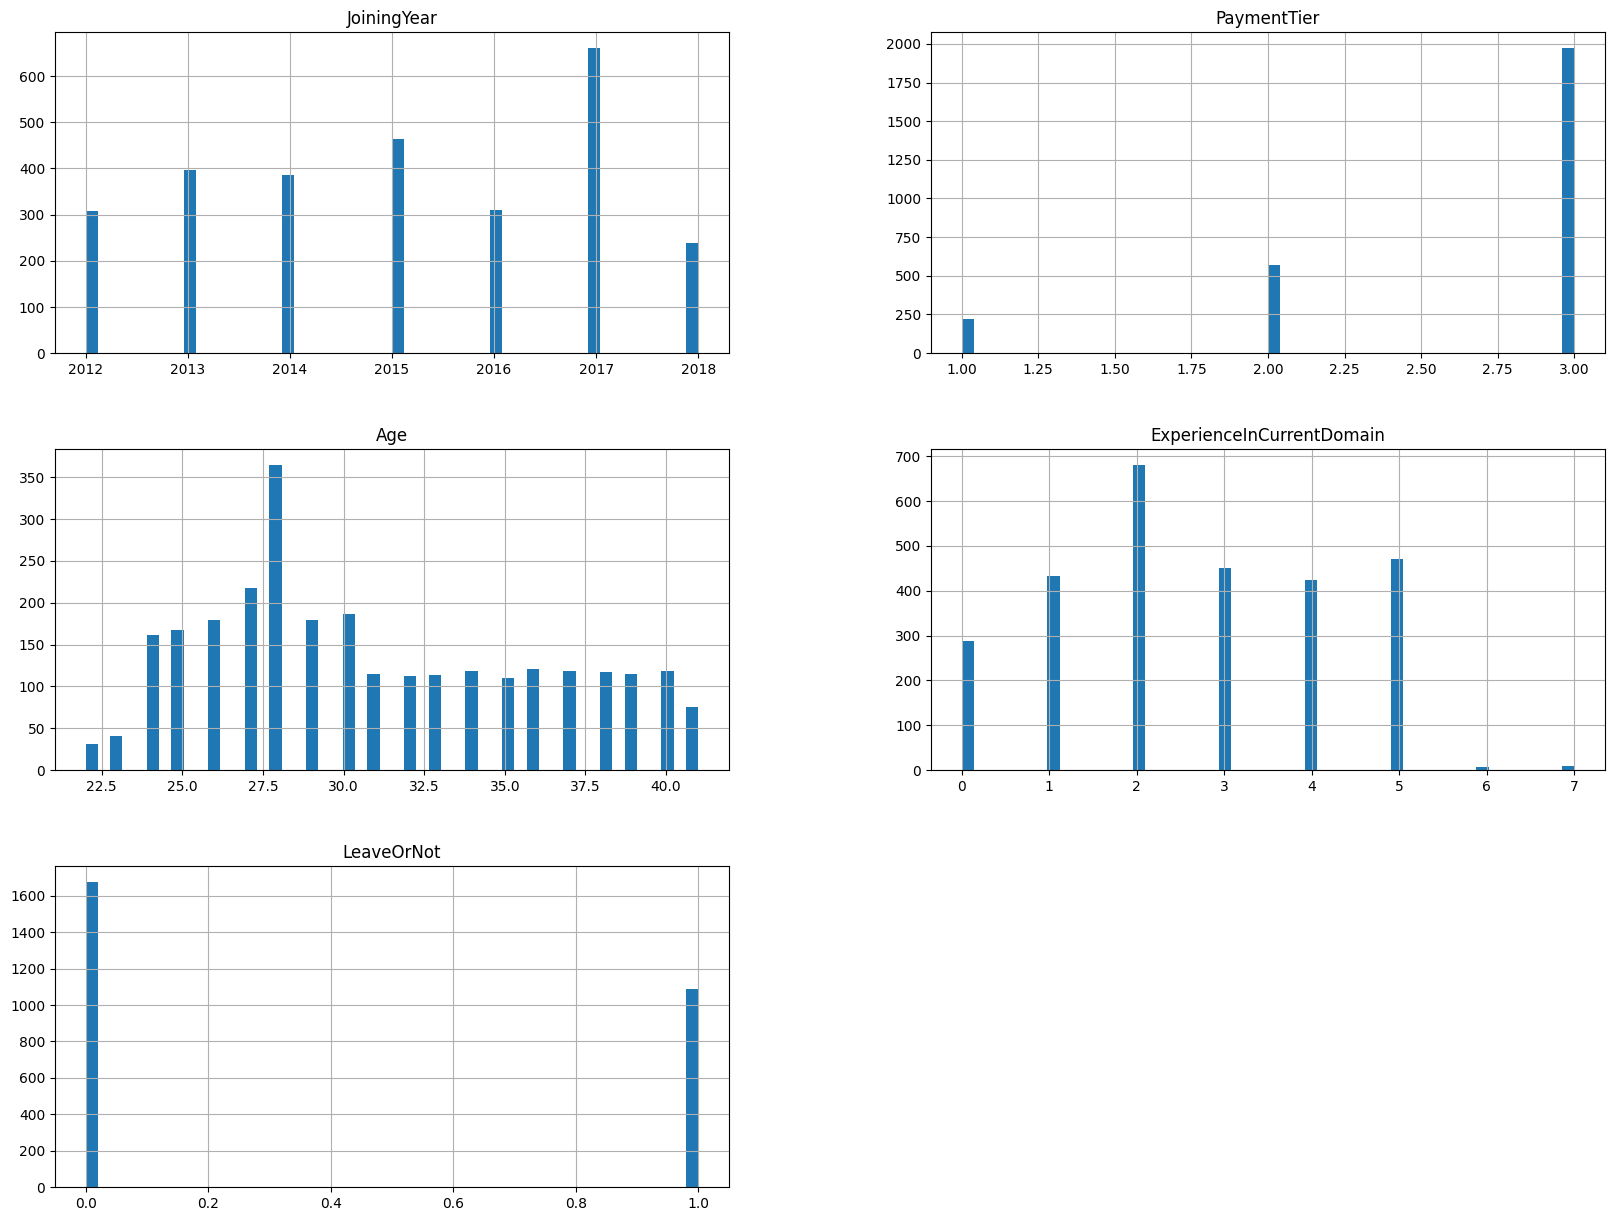

In [28]:
df.hist(figsize=(20, 15), bins=50);

In [29]:
df['LeaveOrNot'].value_counts()

LeaveOrNot
0    1676
1    1088
Name: count, dtype: int64

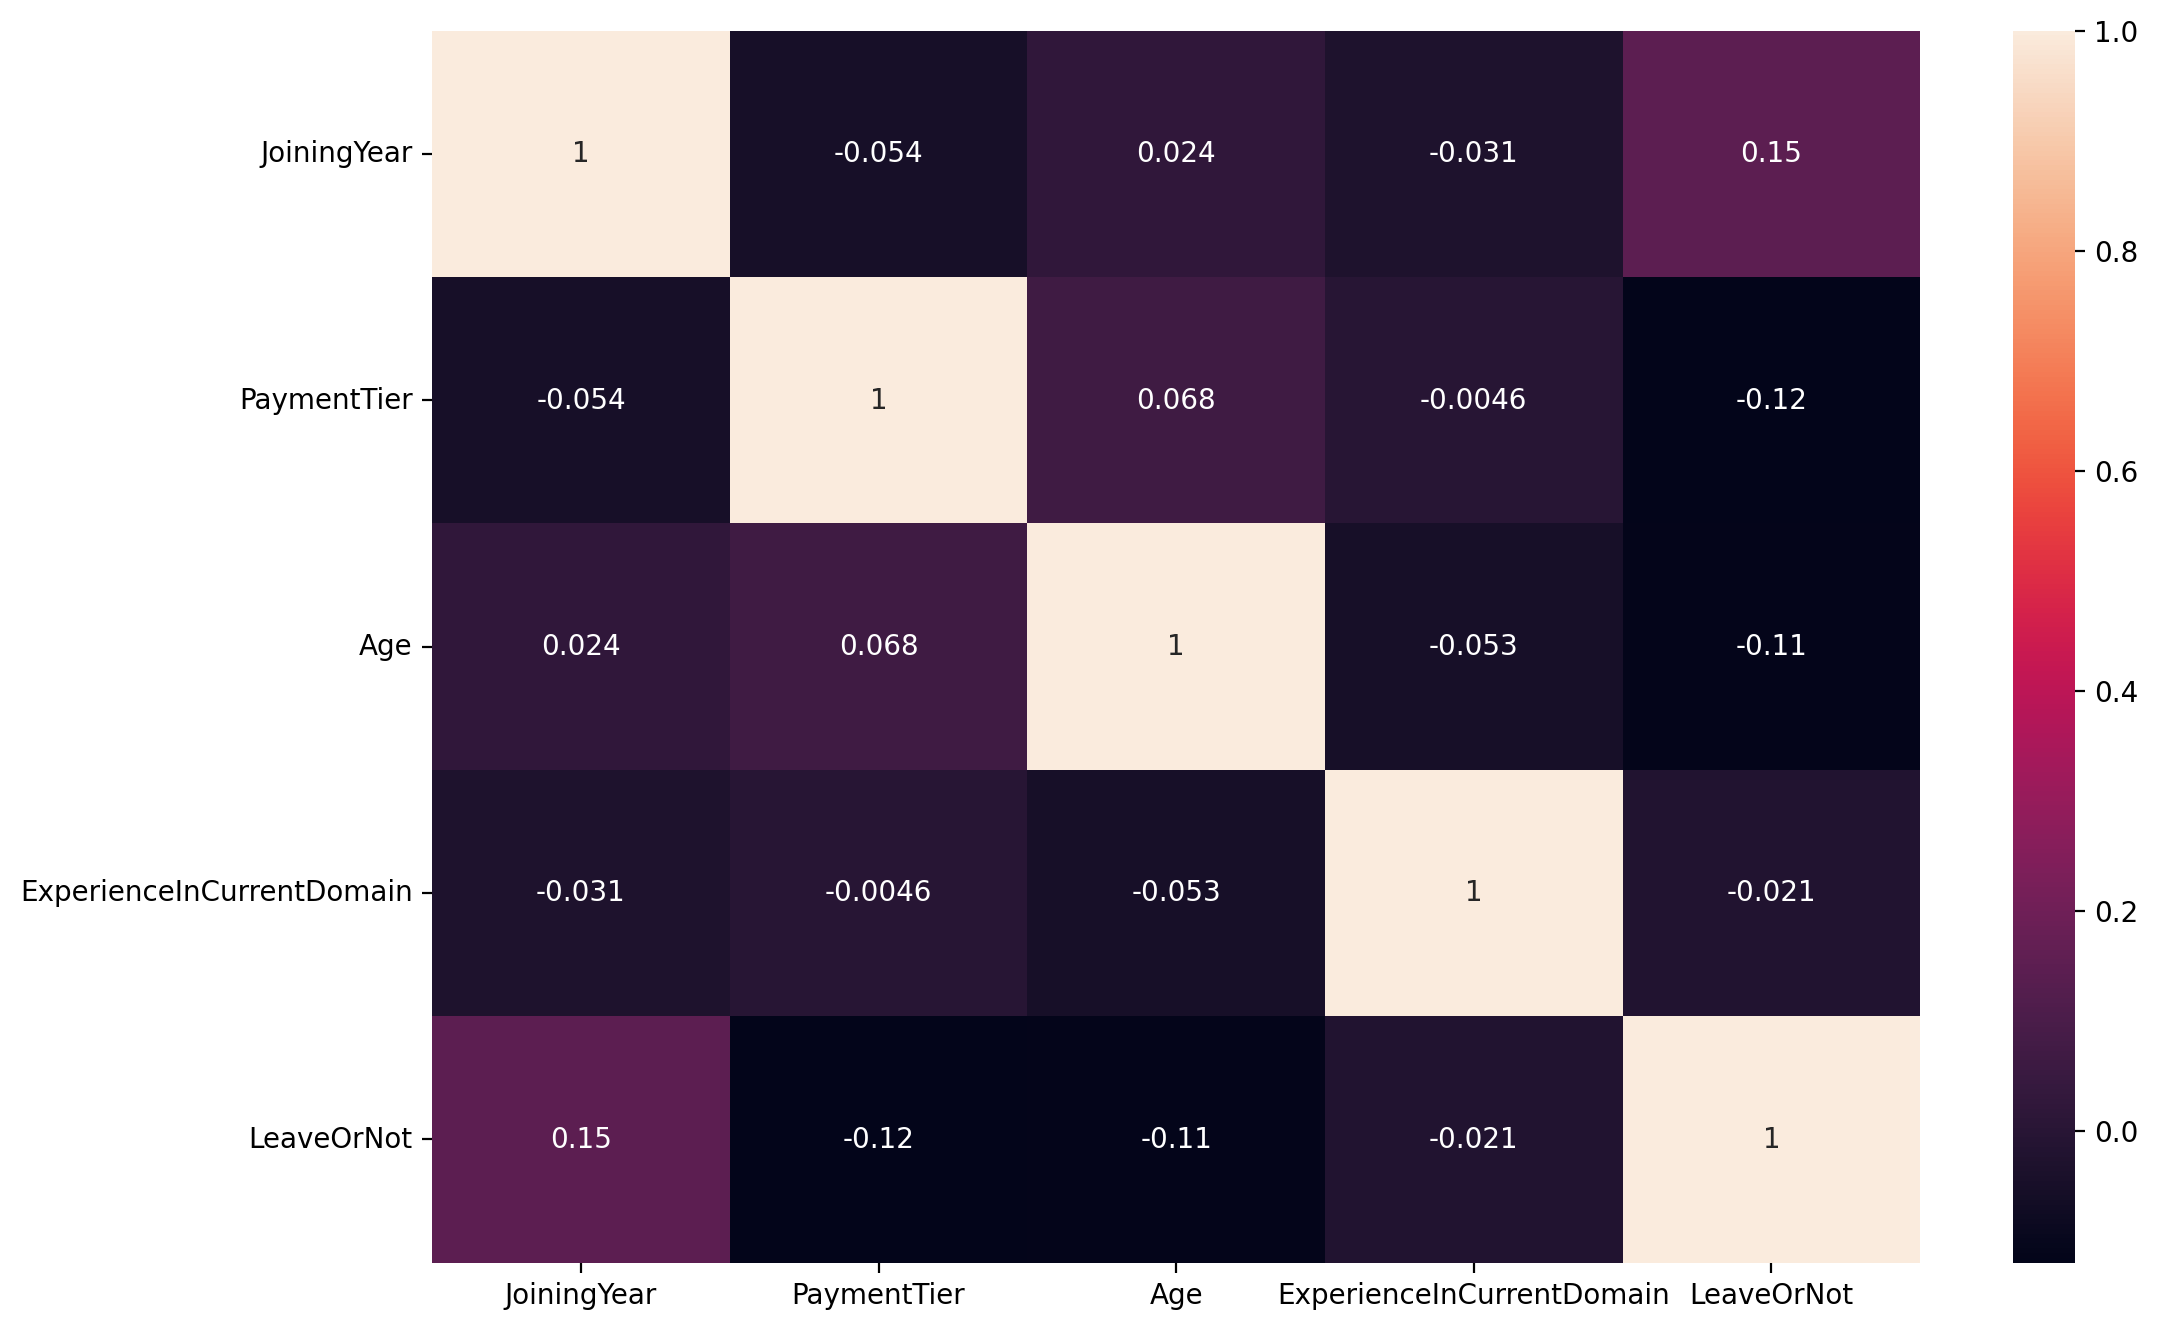

In [39]:
num_cols = df.select_dtypes(include='number')
corr_matrix = num_cols.corr()
fig, ax = plt.subplots(figsize=(12, 8), dpi=200)
sns.heatmap(corr_matrix, annot=True);

In [40]:
df['Gender'] = df['Gender'].replace('Female', 0)
df['Gender'] = df['Gender'].replace('Male', 1)

/tmp/ipykernel_7040/356127540.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace('Male', 1)


In [43]:
df['EverBenched'] = df['EverBenched'].map({'No': 0, 'Yes': 1})

In [44]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,1,0,0,0
1,Bachelors,2013,Pune,1,28,0,0,3,1
2,Bachelors,2014,New Delhi,3,38,0,0,2,0
3,Masters,2016,Bangalore,3,27,1,0,5,1
4,Masters,2017,Pune,3,24,1,1,2,1


In [49]:
# converting 'City' column to number with OneHotEncoding technique
data_city_1hot = pd.get_dummies(df['City'], drop_first=True, dtype=int)
data_city_1hot

,New Delhi,Pune
0,0,0
1,0,1
2,1,0
3,0,0
4,0,1
...,...,...
4645,0,1
4647,0,1
4649,0,1
4650,1,0


In [50]:
df.drop('City', axis=1, inplace=True)

In [51]:
df = pd.concat([df, data_city_1hot], axis=1)

In [52]:
df.head()

,Education,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,New Delhi,Pune
0,Bachelors,2017,3,34,1,0,0,0,0,0
1,Bachelors,2013,1,28,0,0,3,1,0,1
2,Bachelors,2014,3,38,0,0,2,0,1,0
3,Masters,2016,3,27,1,0,5,1,0,0
4,Masters,2017,3,24,1,1,2,1,0,1


In [53]:
df['Education'] = df['Education'].map({'Bachelors': 1, 'Masters': 2, 'PHD': 3})
df.head()

,Education,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,New Delhi,Pune
0,1,2017,3,34,1,0,0,0,0,0
1,1,2013,1,28,0,0,3,1,0,1
2,1,2014,3,38,0,0,2,0,1,0
3,2,2016,3,27,1,0,5,1,0,0
4,2,2017,3,24,1,1,2,1,0,1


In [54]:
X = df.drop('LeaveOrNot', axis=1)
y = df['LeaveOrNot']

In [55]:
# Train and Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [56]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42, max_depth=5, max_leaf_nodes=8)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=8, random_state=42)

error is: 0.2575976845151954
              precision    recall  f1-score   support

           0       0.71      0.96      0.82       414
           1       0.87      0.42      0.57       277

    accuracy                           0.74       691
   macro avg       0.79      0.69      0.69       691
weighted avg       0.77      0.74      0.72       691



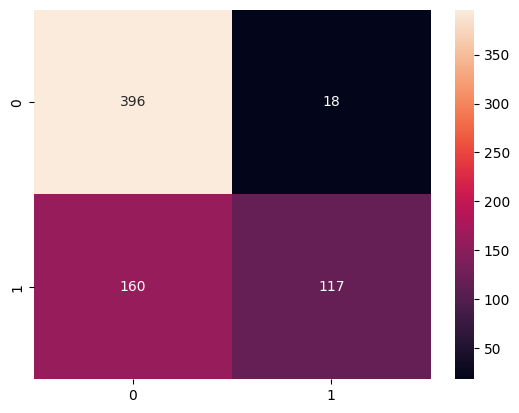

In [58]:
y_pred = model.predict(X_test)
                       
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

error = 1 - accuracy_score(y_test, y_pred)
print(f'error is: {error}')
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f');

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier())
])

param_grid = {'dt__max_depth': [2, 3, 4, 5, 6, 7, 8], 
              'dt__max_leaf_nodes': [5, 6, 7, 8, 9, 10, 11, 12],
              'dt__min_samples_split': [1, 2, 3, 4, 5]}

grid_model = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')
grid_model.fit(X_train, y_train)

/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
560 fits failed out of a total of 2800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
560 fits failed with the following error:
Traceback (most recent call last):
  File "/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fi

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'dt__max_leaf_nodes': [5, 6, 7, 8, 9, 10, 11, 12],
                         'dt__min_samples_split': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [64]:
grid_model.best_params_

{'dt__max_depth': 7, 'dt__max_leaf_nodes': 12, 'dt__min_samples_split': 2}

error is: 0.2474674384949349
              precision    recall  f1-score   support

           0       0.71      0.98      0.83       414
           1       0.93      0.41      0.57       277

    accuracy                           0.75       691
   macro avg       0.82      0.70      0.70       691
weighted avg       0.80      0.75      0.72       691



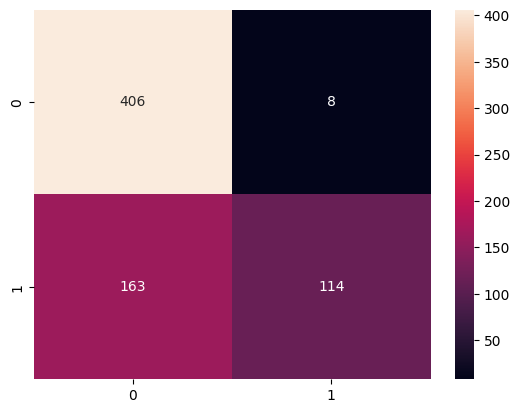

In [66]:
grid_pred = grid_model.predict(X_test)
                       
error = 1 - accuracy_score(y_test, grid_pred)
print(f'error is: {error}')
print(classification_report(y_test, grid_pred))
sns.heatmap(confusion_matrix(y_test, grid_pred), annot=True, fmt='.0f');